# Logistic Regression

Now that we can calculate gradient descent for any function, lets apply the steps to a logistic function. Logistic regression is used in classification. Logistic function outputs a number between 0 and 1, which help us to understand for example if a picture cat or no.




## Sigmoid Function

We define the sigmoid function as below:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

Lets plot the function to see what it outputs:


In [82]:
import numpy as np
import matplotlib.pyplot as plt
def g(z):
    return 1 / (1 + np.exp(-z))

Text(0, 0.5, 'g(z)')

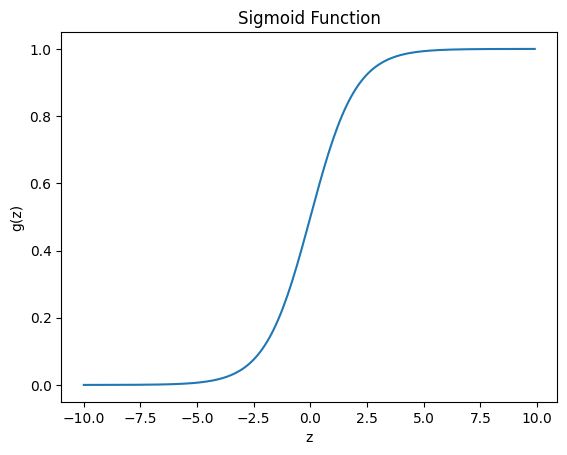

In [83]:
x = np.arange(-10, 10, 0.1)
y = g(x)

plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("g(z)")

You can see that the output of the function is between 0 and 1. Also this is very good for classification due that the function slowly switch between 0 and 1.

Now that we have seen our sigmoid function, we introduce **z** as follow:

$$ z = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$

## Logistic Function

Finally our logistic function becomes:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$ 

where

$$g(z) = \frac{1}{1+e^{-z}}$$


## Goal

Given a dataset like this:

|  x1 |  x2 | y |
|-----|-----|---|
| 0.5 | 1.5 | 0 |
|  1  |  1  | 0 |
| 1.5 | 0.5 | 0 |
|  3  | 0.5 | 1 |
|  2  |  2  | 1 |
|  1  | 2.5 | 1 |

Fit the best logistic function!

## Solution

We know that cost function with regularization is defined as below:

$$ J_{\mathbf{w},b} = \frac {1}{m} (\sum_{i=0}^{m-1}L(f_{\mathbf{w},b}(\mathbf{x^{(i)}}),y^{(i)})) + \frac {\lambda}{2m}(\sum_{j=1}^{n}w_j^2)$$

### Loss Function

Now we need to define the loss function. Our loss function should follow the rules:

1. Should determine how far is the function output from the expected output
2. Should be positive
3. We should select the correct loss function that makes a convex (a function with only one global minimum and no local minimum) cost function ($J_{\mathbf{w},b}$).

In practice, when we apply linear regression loss function to logistic regression, we see that the function is not convex and has a multiple local minimum. 

#### Cross-Entropy Loss Function

The best loss function that works for logistic regression, which is called cross-entropy, is defined as below:

\begin{equation}
  L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

Which we can write as a mathematical function:

$$ L(f_{\mathbf{w},b}(\mathbf{x}^{(i)})) = -y^{(i)} \left(\log(f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right) - (1 - y^{(i)}) \left(\log(1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right) $$


### Gradient Descent

Now that we have our cost function, we can get derivative of it. We need to calculate each of $\frac {\partial J_{\mathbf{w}, b}} {\partial w_1}$ ,$\frac {\partial J_{\mathbf{w}, b}} {\partial w_2}$, ... ,$\frac {\partial J_{\mathbf{w}, b}} {\partial w_n}$, $\frac {\partial J_{\mathbf{w}, b}} {\partial b}$ (mathematical work!)

So lets begin (it's going to be very long mathematical work, so enjoy!)

Note: In logistic regression, the default base of log is e. So you can assume it's `ln`! I know it's confusing, but everyone accepted this.

Lets first start by getting $\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j}$

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = -y^{(i)} \frac {1} {f_{\mathbf{w},b}(\mathbf{x}^{(i)})} \frac {\partial f} {\partial w_j} + \frac {1 - y^{(i)}} {1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})} \frac {\partial f} {\partial w_j}$$

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \frac {\partial f} {\partial w_j} \left( \frac {1 - y^{(i)}} {1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})} - \frac {y^{(i)}} {f_{\mathbf{w},b}(\mathbf{x}^{(i)})} \right)$$

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \frac {\partial f} {\partial w_j} \left( \frac { f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} + y^{(i)} f_{\mathbf{w},b}(\mathbf{x}^{(i)})} { f_{\mathbf{w},b}(\mathbf{x}^{(i)}) ( 1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} \right)$$

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \frac {\partial f} {\partial w_j} \frac { f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}} { f_{\mathbf{w},b}(\mathbf{x}^{(i)}) ( 1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} \tag{1}$$

Now that we have the partial derivation for loss function we need to replace the f. We know that:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$ 

where

$$g(z) = \frac{1}{1+e^{-z}}$$

so:

$$ \frac {\partial f}{\partial w_j} = \frac {\partial g} {\partial w_j} $$


Now for g, we get the chain derivative:

$$ \frac {\partial g}{\partial w_j} = \frac {e^{-z}} {(1 + e^{-z}) ^ 2} \frac {\partial z} {\partial w_j}$$

And for z we have: 

$$ z = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$

Therefore the derivative for it is equal to:

$$ \frac {\partial z}{\partial w_j} = x_j^{(i)} $$

So our derivative for g , becomes:

$$ \frac {\partial g}{\partial w_j} = \frac {e^{-z}} {(1 + e^{-z}) ^ 2} x_j^{(i)} $$

Now by replacing the g in the loss function (formula 1) (note that g = f):

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \frac {e^{-z}} {(1 + e^{-z}) ^2} \frac { \frac {1}{1 + e^{-z}} - y^{(i)}} { \frac {1}{1 + e^{-z}} (1 - \frac{1}{1 + e^{-z}})} x_j^{(i)} $$

After simplifying the equation we get to:

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \left( \frac {1}{1 + e^{-z}} - y^{(i)} \right) x_j^{(i)} $$

Which is equal to:

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} $$

And by reaping the same steps for b, we get:

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial b} = f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} $$

Now that we have the equations for loss functions, we can easily replace them in the cost function.

$$ J_{\mathbf{w},b} = \frac {1}{m} (\sum_{i=0}^{m-1}L(f_{\mathbf{w},b}(\mathbf{x^{(i)}}),y^{(i)})) + \frac {\lambda}{2m}(\sum_{j=1}^{n}w_j^2)$$

$$ \frac {\partial J_{\mathbf{w},b}} {\partial w_j} = \frac {1}{m} (\sum_{i=0}^{m-1}\frac{\partial L}{\partial w_j}) + \frac {\lambda}{m} w_j $$


$$ \Rightarrow \frac {\partial J_{\mathbf{w},b}} {\partial w_j} = \frac {1}{m} \sum_{i=0}^{m-1}\left( (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}\right) + \frac {\lambda}{m} w_j $$

And doing the same steps for b:

$$ \Rightarrow \frac {\partial J_{\mathbf{w},b}} {\partial b} = \frac {1}{m} \sum_{i=0}^{m-1}\left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right) $$ 


Which if you remember, it's same as linear regression! Just that f(x) is different for them.

## Code

In [84]:
def f_wb(X, w, b):
    z = np.dot(X,w) + b
    return g(z) # g function is defined above

In [85]:
def compute_cost(X_train, y_train, w, b):
    m = X_train.shape[0]
    
    predictions = f_wb(X_train, w, b)
    cost = (-1/m) * np.sum(y_train * np.log(predictions) + (1 - y_train) * np.log(1 - predictions))
    return cost

In [86]:
def compute_gradient(X_train, y_train, w, b, lambda_value):
    m = X_train.shape[0]
    
    # Compute predictions and errors
    predictions = f_wb(X_train, w, b)
    errors = predictions - y_train
    
    # Compute gradients
    dj_dw = np.dot(errors, X_train) / m + w * lambda_value / m
    dj_db = np.sum(errors) / m
    
    return dj_dw, dj_db

In [87]:
def fit_regression(X_train, y_train, initial_w, initial_b, alpha, lambda_value, iterations, record_step):
    w = initial_w
    b = initial_b
    J_history = []
    for iteration in range(iterations):
        # Save J for every 100 iteration:
        if (iteration % record_step == 0):
            J_history.append(compute_cost(X_train, y_train, w, b))
        dj_dw, dj_db = compute_gradient(X_train, y_train, w, b, lambda_value)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    
    return w, b, J_history

In [88]:
def plot_decision_boundary(X, y, w, b):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))

    Z = f_wb(np.c_[xx1.ravel(), xx2.ravel()], w, b)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdYlBu')

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', marker='o')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()


In [89]:
def run_logistic_regression(X_train, y_train, alpha, lambda_value, iterations, record_step=100):
    b_initial = 0.
    w_initial = np.zeros_like(X_train[0], dtype='float64')
    
    w, b, J_history = fit_regression(X_train, y_train, w_initial, b_initial, alpha, lambda_value, iterations, record_step)

    cost = compute_cost(X_train, y_train, w, b)
    print(f"cost: {cost}, alpha: {alpha}, iterations: {iterations}, w: {w}, b: {b}")
    plot_decision_boundary(X_train, y_train, w, b)

    # Learning Curve Function
    iteration = np.arange(0, iterations, record_step)
    J_history = np.array(J_history)
    plt.plot(iteration, J_history, color='blue', label='Learning Curve (Cost per iteration)')

    plt.xlabel('Iteration')
    plt.ylabel('Cost function')

    plt.legend()
    plt.show

cost: 0.001886248521688812, alpha: 0.09, iterations: 100000, w: [8.21279391 8.01191384], b: -22.304315646294768


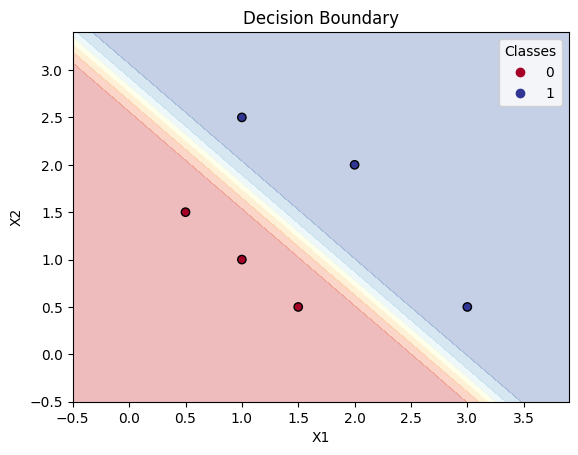

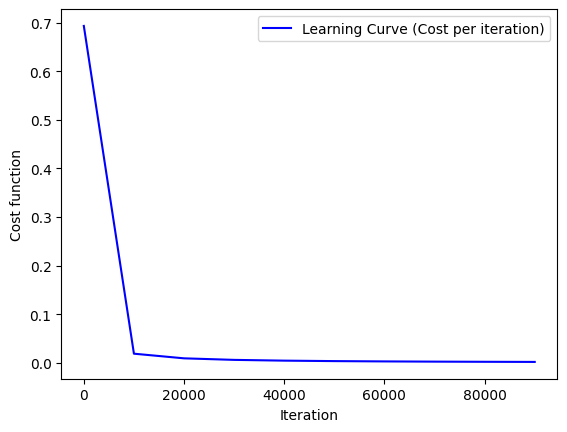

In [90]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0., 0., 0., 1., 1., 1.])

alpha = 9.0e-2
lambda_value = 0 # Lambda value for overfitting, we don't want to use regulation for now
iterations = 100_000

run_logistic_regression(X_train, y_train, alpha, lambda_value, iterations, record_step=10_000)

cost: 0.002744199115448779, alpha: 0.1, iterations: 100000, w: [11.87167745  2.85122405], b: -24.46295567361338


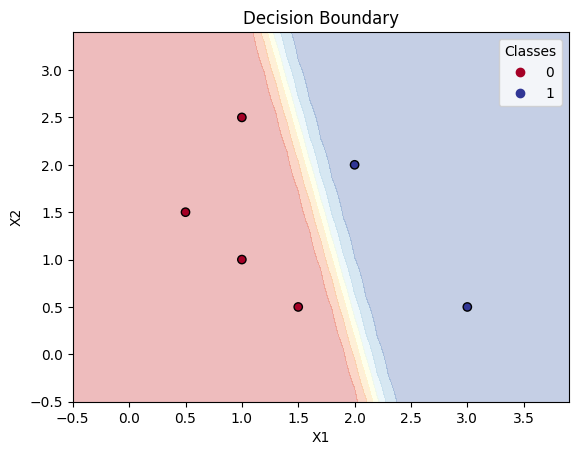

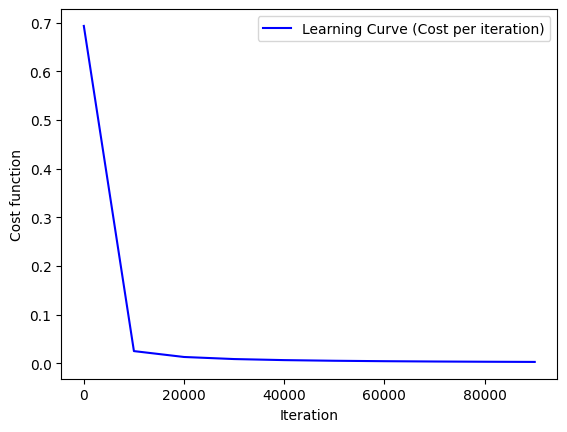

In [91]:
## Another example, just a little changes to data

X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0., 0., 0., 1., 1., 0.])

alpha = 1.0e-1
lambda_value = 0 # Lambda value for overfitting, we don't want to use regulation for now
iterations = 100_000

run_logistic_regression(X_train, y_train, alpha, lambda_value, iterations, record_step=10_000)